In [1]:
from galpy.potential import MWPotential2014, KeplerPotential, evaluateDensities, evaluateRforces, evaluateR2derivs
from galpy.potential.mwpotentials import DehnenBinney98I
from galpy.orbit import Orbit
from galpy.util import bovy_conversion
from galpy.util.bovy_conversion import get_physical
from astropy import units, imperial
imperial.enable()
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, parsec, giga, year
G *= (bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0)*1000.0*parsec)**(-3.0) * (bovy_conversion.mass_in_msol(220.0, 8.0)*(2.0*10.0**30.0)) * (bovy_conversion.time_in_Gyr(220.0,8.0)*giga*year)**(2.0)

/home/ppxest/anaconda3/lib/python3.7/site-packages/astropy/extern/six.py:15: AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed
  AstropyDeprecationWarning)



In [2]:
#Add black hole at the centre of the Galaxy
#MWPotential2014.append(KeplerPotential(amp=4*10**6./bovy_conversion.mass_in_msol(220.,8.)))

In [3]:
#Function to calculate Jacobi radius
def jacobiRadius(potential, R, z, phi, t, M_b):
    dPhidR = -evaluateRforces(potential, R, z, phi, t)
    d2PhidR2 = evaluateR2derivs(potential, R, z, phi, t)
    return (G*M_b/R *(dPhidR/(R**2.0) - d2PhidR2/R)**(-1.0))**(1.0/3.0)

In [4]:
#o = Orbit(vxvv=[1.,0.1,1.1,0.,0.1,0.])
#o = Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))
#o = Orbit(**get_physical(DehnenBinney98I))
#o.turn_physical_off()
#o.flip(inplace = True)

In [5]:
#Integration time
ts = np.linspace(0.,-10.0,2001)*units.Gyr/10.0
N_t = np.size(ts)

In [6]:
#Integrate orbit
#o.integrate(ts, MWPotential2014)
#o.integrate(ts, DehnenBinney98I)

In [7]:
#Find time corresponding to minimum R
#R_min = o.R(ts[0])
#t_min = ts[0]
#for t in ts:
#    if (o.R(t) < R_min):
#        R_min = o.R(t)
#        t_min = t
#Calculate Jacobi radius
#r_J = jacobiRadius(DehnenBinney98I, o.R(t_min), o.z(t_min), o.phi(t_min), t_min, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
#r_J = jacobiRadius(DehnenBinney98I, o.R(), o.z(), o.phi(), 0, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
#print('Jacobi radius, pc =', r_J*1000.0*bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0))

In [8]:
#Evaluate average dark matter density and stellar density
#avg_dm_density = 0.0
#avg_stellar_density = 0.0
#for i in range(N_t):
#    avg_dm_density += evaluateDensities(MWPotential2014[2], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
#    avg_stellar_density += evaluateDensities(MWPotential2014[0], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T + evaluateDensities(MWPotential2014[1], o.R(ts[i]), o.z(ts[i]), o.phi(ts[i]), ts[i])*dt/T
#print('Average dark matter density =', avg_dm_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))
#print('Average stellar density =', avg_stellar_density*bovy_conversion.dens_in_msolpc3(220.0, 8.0))

In [9]:
#o.plot(vo=220.0, ro=8.0)
#o.plot(**get_physical(DehnenBinney98I))

In [10]:
#orbits = [Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 10536', 'NLTT 16394', 'NLTT 39456']
#overp = [False, True, True]
#xplots = ['R', 'R', 'R']

#orbits = [Orbit([227.55005147436, -16.39466183454, 0.0294229, -997.999, -3542.377, 310.88], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 39456 manual', 'NLTT 39456 auto']

orbits = [Orbit([049.62122952700, -07.14196049755, 0.225927, 169.224, -355.297, 152.28], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I))]
labels = ['NLTT 10536 manual', 'NLTT 10536 auto']

overp = [False, True]
xplots = ['R', 'R']
for orbi in orbits:
    orbi.turn_physical_off()
    orbi.integrate(ts, DehnenBinney98I)

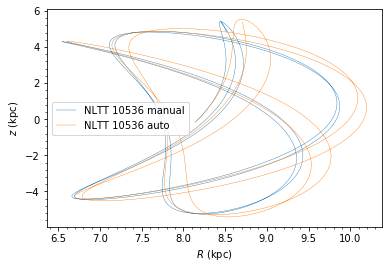

In [11]:
for orbi,label,over,xplot in zip(orbits,labels,overp,xplots):
    orbi.plot(d1=xplot, d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)
plt.legend()
#plt.axis([-40, 80, -50, 40])